# Tree based methods

## Overview of Tree-based Methods for Classification Tasks

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("strok_risk.csv")

In [58]:
df

,weight,high_oil_diet,smoking,stroke_risk
0,low,yes,no,low
1,low,no,yes,low
2,high,yes,yes,high
3,middle,no,no,low
4,high,yes,yes,high
5,high,no,yes,high
6,low,yes,no,middle
7,low,no,yes,low
8,low,no,no,low
9,middle,no,yes,high


In [59]:
df["stroke_risk"] = df["stroke_risk"].apply(lambda x: "low" if x == "low" else "high")

In [60]:
df

,weight,high_oil_diet,smoking,stroke_risk
0,low,yes,no,low
1,low,no,yes,low
2,high,yes,yes,high
3,middle,no,no,low
4,high,yes,yes,high
5,high,no,yes,high
6,low,yes,no,high
7,low,no,yes,low
8,low,no,no,low
9,middle,no,yes,high


In [61]:
from collections import Counter

In [62]:
Counter(df["stroke_risk"])

Counter({'low': 8, 'high': 7})

In [63]:
def gini(counter):
    total = sum(counter.values())
    ret = 1
    for key, val in counter.items():
        ret -= (val/total)**2
    return ret

### high oil diet

In [64]:
Counter(df[df["high_oil_diet"]=="yes"]["stroke_risk"])

Counter({'low': 2, 'high': 4})

In [65]:
Counter(df[df["high_oil_diet"]=="no"]["stroke_risk"])

Counter({'low': 6, 'high': 3})

### Smoking

In [66]:
Counter(df[df["smoking"]=="yes"]["stroke_risk"])

Counter({'low': 2, 'high': 5})

In [67]:
Counter(df[df["smoking"]=="no"]["stroke_risk"])

Counter({'low': 6, 'high': 2})

### Weight

#### Is low weight?

In [68]:
Counter(df[df["weight"]=="low"]["stroke_risk"])

Counter({'low': 4, 'high': 1})

In [69]:
gini(Counter(df[df["weight"]=="low"]["stroke_risk"]))

0.31999999999999984

In [70]:
Counter(df[df["weight"]!="low"]["stroke_risk"])

Counter({'high': 6, 'low': 4})

In [71]:
gini(Counter(df[df["weight"]!="low"]["stroke_risk"]))

0.48

In [72]:
0.32*1/3 + 0.48*2/3

0.4266666666666667

#### Is middle weight?

In [73]:
Counter(df[df["weight"]=="middle"]["stroke_risk"])

Counter({'low': 4, 'high': 3})

In [74]:
gini(Counter(df[df["weight"]=="middle"]["stroke_risk"]))

0.48979591836734704

In [75]:
Counter(df[df["weight"]!="middle"]["stroke_risk"])

Counter({'low': 4, 'high': 4})

In [76]:
gini(Counter(df[df["weight"]!="middle"]["stroke_risk"]))

0.5

In [77]:
0.490*7/15+0.5*8/15

0.4953333333333333

#### Is high weight?

In [78]:
Counter(df[df["weight"]=="high"]["stroke_risk"])

Counter({'high': 3})

In [79]:
Counter(df[df["weight"]!="high"]["stroke_risk"])

Counter({'low': 8, 'high': 4})

In [80]:
gini(Counter(df[df["weight"]!="high"]["stroke_risk"]))

0.4444444444444445

In [81]:
4/9*12/15

0.3555555555555555

### The right branch

In [82]:
df_right = df[df["weight"]!="high"]

In [83]:
df_right

,weight,high_oil_diet,smoking,stroke_risk
0,low,yes,no,low
1,low,no,yes,low
3,middle,no,no,low
6,low,yes,no,high
7,low,no,yes,low
8,low,no,no,low
9,middle,no,yes,high
10,middle,no,no,low
11,middle,yes,no,high
12,middle,no,yes,high


### smoking

In [84]:
Counter(df_right[df_right["smoking"]=="yes"]["stroke_risk"])

Counter({'low': 2, 'high': 2})

In [85]:
Counter(df_right[df_right["smoking"]!="yes"]["stroke_risk"])

Counter({'low': 6, 'high': 2})

In [86]:
0.375*2/3+0.5/3

0.41666666666666663

### high oil diet

In [87]:
Counter(df_right[df_right["high_oil_diet"]=="yes"]["stroke_risk"])

Counter({'low': 2, 'high': 2})

In [88]:
Counter(df_right[df_right["high_oil_diet"]=="no"]["stroke_risk"])

Counter({'low': 6, 'high': 2})

### low weight?

In [89]:
Counter(df_right[df_right["weight"]=="low"]["stroke_risk"])

Counter({'low': 4, 'high': 1})

In [90]:
gini(Counter(df_right[df_right["weight"]=="low"]["stroke_risk"]))

0.31999999999999984

In [91]:
Counter(df_right[df_right["weight"]!="low"]["stroke_risk"])

Counter({'low': 4, 'high': 3})

In [92]:
gini(Counter(df_right[df_right["weight"]!="low"]["stroke_risk"]))

0.48979591836734704

In [93]:
0.32*5/12 + 0.49*7/12

0.4191666666666667

### Final splitting

#### The high oil diet group

In [94]:
df_right[df_right["high_oil_diet"]=="yes"]

,weight,high_oil_diet,smoking,stroke_risk
0,low,yes,no,low
6,low,yes,no,high
11,middle,yes,no,high
13,middle,yes,no,low


#### The non-high oil diet group

In [95]:
df_right[df_right["high_oil_diet"]!="yes"]

,weight,high_oil_diet,smoking,stroke_risk
1,low,no,yes,low
3,middle,no,no,low
7,low,no,yes,low
8,low,no,no,low
9,middle,no,yes,high
10,middle,no,no,low
12,middle,no,yes,high
14,middle,no,no,low


## Regression Tree

#### Create artificial data

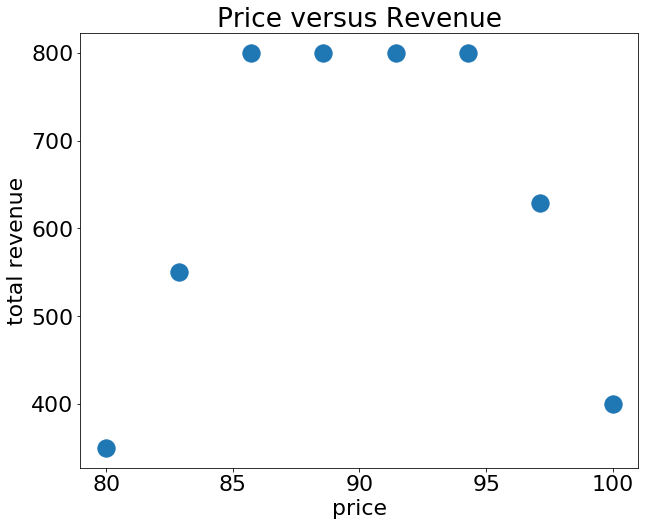

In [96]:
def price_2_revenue(price):
    if price < 85:
        return 70 * abs(price - 75)
    elif price < 95:
        return 10 * 80
    else:
        return 80 * (105 - price)
plt.rcParams.update({'font.size': 22})
prices = np.linspace(80,100,8)
revenue = np.array([price_2_revenue(price) for price in prices])
plt.figure(figsize=(10,8))
plt.scatter(prices,revenue,s=300)
plt.xlabel("price")
plt.ylabel("total revenue")
plt.title("Price versus Revenue");

In [97]:
pd.DataFrame({"Price":prices,"Revenue":revenue})

,Price,Revenue
0,80.000000,350.000000
1,82.857143,550.000000
2,85.714286,800.000000
3,88.571429,800.000000
4,91.428571,800.000000
5,94.285714,800.000000
6,97.142857,628.571429
7,100.000000,400.000000


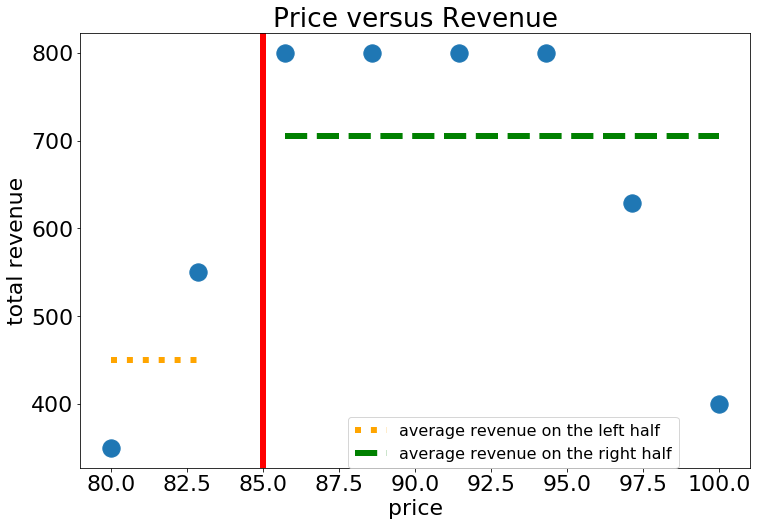

In [98]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,8))
plt.scatter(prices,revenue,s=300)
plt.xlabel("price")
plt.ylabel("total revenue")
plt.title("Price versus Revenue")
threshold = 85
num_left = sum(prices < threshold)
ave_left = np.mean(revenue[prices < threshold])
num_right = sum(prices > threshold)
ave_right = np.mean(revenue[prices > threshold])

plt.axvline(threshold,color="red",linewidth=6)
plt.plot(prices[prices < threshold], [ave_left for _ in range(num_left)],
         linewidth=6,linestyle=":",c="orange", 
         label= "average revenue on the left half")
plt.plot(prices[prices > threshold], [ave_right for _ in range(num_right)],
         linewidth=6,linestyle="--",c="green",
        label="average revenue on the right half");
plt.rcParams.update({'font.size': 16})
plt.legend(loc=[0.4,0]);

#### predicted revenue for both sides

In [99]:
print(ave_left,ave_right)

450.0000000000001 704.7619047619049


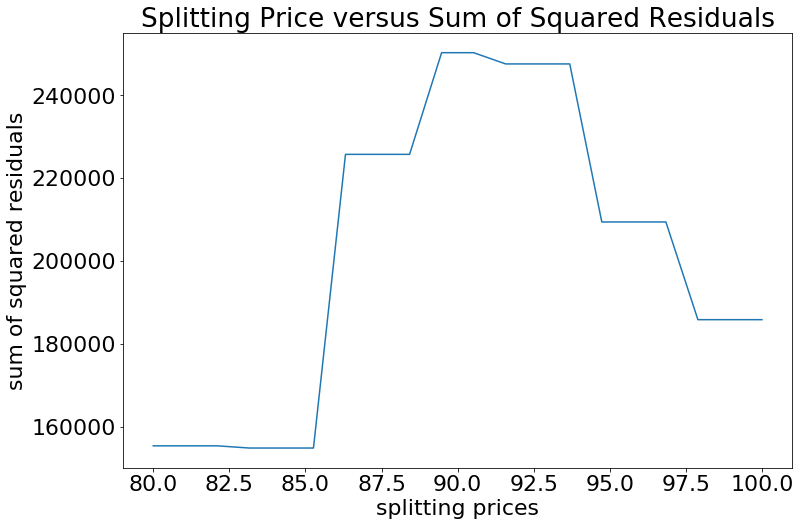

In [100]:
def cal_ssr(arr):
    if len(arr)==0:
        return 0
    ave = np.mean(arr)
    return np.sum((arr-ave)**2)
splitting_values = np.linspace(80,100,20)
ssr_values = []
for splitting_value in splitting_values:
    ssr = cal_ssr(revenue[prices < splitting_value]) + cal_ssr(revenue[prices > splitting_value])
    ssr_values.append(ssr)
    
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,8))
plt.xlabel("splitting prices")
plt.ylabel("sum of squared residuals")
plt.title("Splitting Price versus Sum of Squared Residuals")
plt.plot(splitting_values,ssr_values);

### Splitting on the second node at depth 1

In [101]:
root_splitting_value = 85
prices_right = prices[prices > root_splitting_value]
revenue_right = revenue[prices > root_splitting_value]

In [102]:
np.mean(revenue_right[prices_right < 93])

800.0

In [103]:
np.mean(revenue_right[prices_right > 93])

609.5238095238096

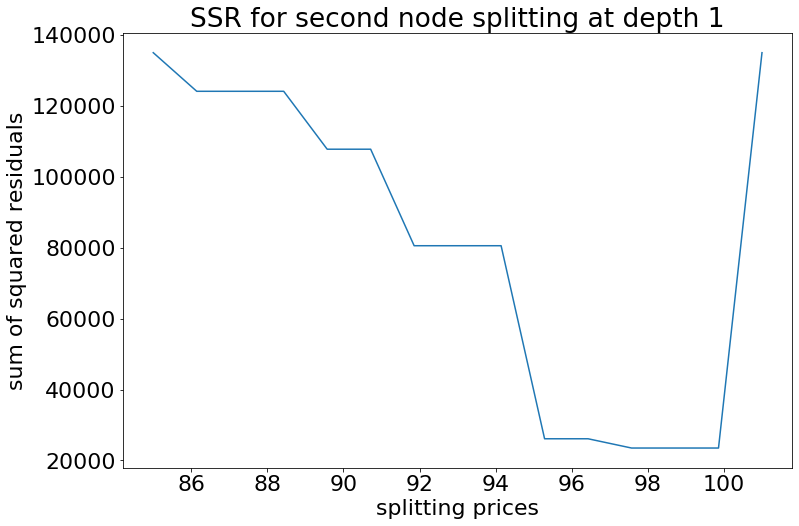

In [104]:
splitting_values = np.linspace(85,101,15)
ssr_values = []
for splitting_value in splitting_values:
    ssr = cal_ssr(revenue_right[prices_right < splitting_value]) + cal_ssr(revenue_right[prices_right > splitting_value])
    ssr_values.append(ssr)
    
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,8))
plt.xlabel("splitting prices")
plt.ylabel("sum of squared residuals")
plt.title("SSR for second node splitting at depth 1")
plt.plot(splitting_values,ssr_values);

### Final look

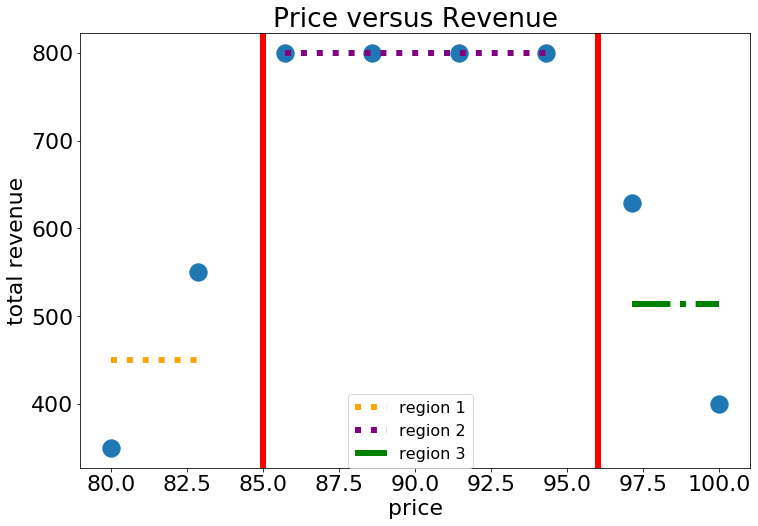

In [105]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,8))
plt.scatter(prices,revenue,s=300)
plt.xlabel("price")
plt.ylabel("total revenue")
plt.title("Price versus Revenue")
threshold1 = 85
threshold2 = 96

num_left = sum(prices < threshold1)
ave_left = np.mean(revenue[prices < threshold1])
num_mid = sum(np.logical_and(prices > threshold1, prices < threshold2))
ave_mid = np.mean(revenue[ np.logical_and(prices > threshold1, prices < threshold2)])
num_right = sum(prices > threshold2)
ave_right = np.mean(revenue[prices > threshold2])

plt.axvline(threshold1,color="red",linewidth=6)
plt.axvline(threshold2,color="red",linewidth=6)

plt.plot(prices[prices < threshold1], [ave_left for _ in range(num_left)],
         linewidth=6,linestyle=":",c="orange", 
         label= "region 1")

plt.plot(prices[np.logical_and(prices > threshold1, prices < threshold2)], [ave_mid for _ in range(num_mid)],
         linewidth=6,linestyle=":",c="purple", 
         label= "region 2")

plt.plot(prices[prices > threshold2], [ave_right for _ in range(num_right)],
         linewidth=6,linestyle="-.",c="green",
        label="region 3")

plt.rcParams.update({'font.size': 16})
plt.legend(loc=[0.4,0]);
plt.savefig("B15247_10_18.png")

## Scikit-learn APi

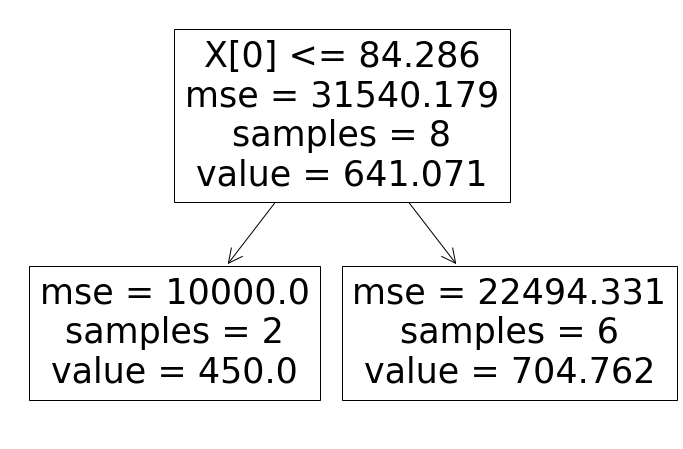

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
prices, revenue = prices.reshape(-1,1), revenue.reshape(-1,1)
regressor = DecisionTreeRegressor(random_state=0,max_depth=1)
regressor.fit(prices,revenue)

plt.figure(figsize=(12,8))
tree.plot_tree(regressor);

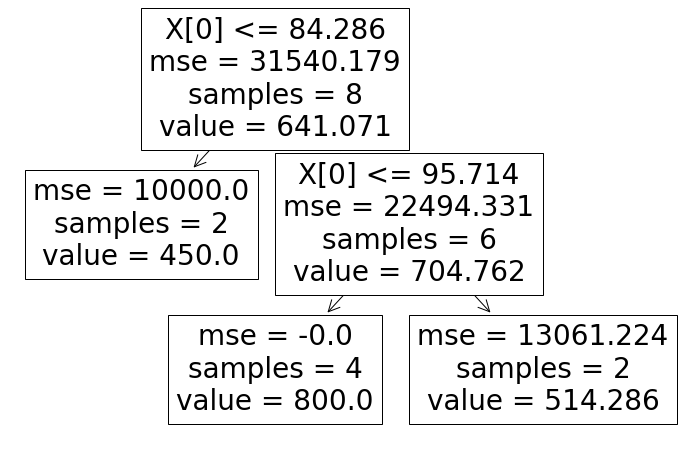

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
prices, revenue = prices.reshape(-1,1), revenue.reshape(-1,1)
regressor = DecisionTreeRegressor(random_state=0,max_depth=2,min_samples_leaf=2)
regressor.fit(prices,revenue)

plt.figure(figsize=(12,8))
tree.plot_tree(regressor);